<a href="https://colab.research.google.com/github/vkanumuri86/Hugging-face/blob/main/Feature_Eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Missing Values

In [ ]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df.shape

(891, 15)

In [ ]:
df.dropna().shape

(182, 15)

<Axes: xlabel='age', ylabel='Count'>

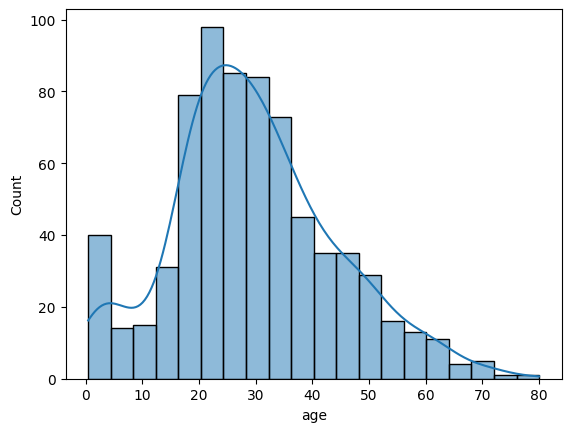

In [ ]:
# imputation of missing values

#1. Mean value

sns.histplot(df['age'],kde =True)

In [ ]:
df['Age_mean'] = df['age'].fillna(df['age'].mean())

In [ ]:
df[["Age_mean","age"]]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [ ]:
# median value imputation  -  if we have outlier in dataset

df['Age_median'] = df['age'].fillna(df['age'].median())
df[["Age_median","age"]]


,Age_median,age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,28.0,NaN
889,26.0,26.0


In [ ]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,Age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [ ]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
#df[df['embarked'].notna()]['embarked'].mode()[0]

In [ ]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]

In [ ]:
mode_value

'S'

In [ ]:
df['embarked_mode'] = df['embarked'].fillna(mode_value)

In [ ]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [ ]:
df['embarked_mode'].isnull().sum()

0

In [ ]:
df['embarked'].isnull().sum()

2

# Five number summary

# min , max , median , q1 ,q3 ,iqr

In [ ]:
# q1 (first quartile) =the 25th percentile ( the value below which 25% of the data falls)
# q3 (third quartile ) =  the 75th percentile ( the value below which 75% of data falls)

# IQR = (interquartile Range) =  is measure of dispersion , it represtnts the range within which the middle 50% of data lies  = IQR = Q3-Q1

# IQR = is useful for detecting outliers bcz it focuses on spread of the central portion of the data . ignoring extreme values

# lower_fence = q1-1.5(IQR)
# upper_fence =q3+1.5(IQR)

In [ ]:
# box plot

In [ ]:
import numpy as np
lst_marks = [45,32,56,75,89,54,32,89,90,87,67,54,45,98,67,74]
minimum, Q1 ,median , Q3, maximum = np.quantile(lst_marks,[0,0.25,0.50,0.75,1.0])

In [ ]:
minimum, Q1 ,median , Q3, maximum

(32.0, 51.75, 67.0, 87.5, 98.0)

In [ ]:
IQR = Q3-Q1
IQR

35.75

In [ ]:
lower_fence =Q1-1.5*(IQR)

upper_fence=Q3+1.5*(IQR)


In [ ]:
lower_fence

-1.875

In [ ]:
upper_fence

141.125

<Axes: >

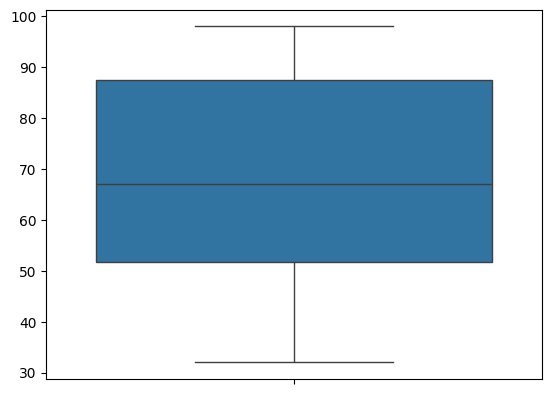

In [ ]:
sns.boxplot(lst_marks)

In [ ]:
lst_marks = [-100,-200,45,32,56,75,89,54,32,89,90,87,67,54,45,98,67,74,150,170,180]##

<Axes: >

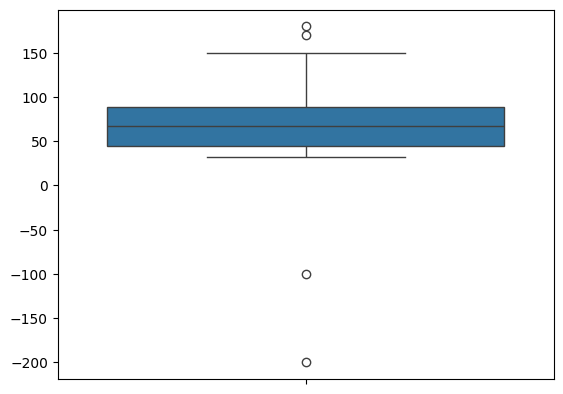

In [ ]:
sns.boxplot(lst_marks)

# Data encoding

# 1. Nominal / OneHotencoding
# 2. Label and ordinal encoding
# 3. target guided ordinal encoding

In [ ]:
# nominal / OHE - technique used to represnt categorical data as numerical data ., which is more suitable for ML algorithms
 # red = [ 1,0,0]
# green = [0,1,0]
# blue = [0 0 1]

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df = pd.DataFrame({'Color':['red','green','green','red','blue']})
df.head()

,Color
0,red
1,green
2,green
3,red
4,blue


In [ ]:
df[['Color']]

,Color
0,red
1,green
2,green
3,red
4,blue


In [ ]:
encoder = OneHotEncoder()   # create an instance
encoded = encoder.fit_transform(df[['Color']]).toarray()


In [ ]:
encoded

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [ ]:
encoder_df = pd.DataFrame(encoded , columns=encoder.get_feature_names_out())

In [ ]:
encoder_df

,Color_blue,Color_green,Color_red
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [ ]:
pd.concat([df,encoder_df],axis =1 )

,Color,Color_blue,Color_green,Color_red
0,red,0.0,0.0,1.0
1,green,0.0,1.0,0.0
2,green,0.0,1.0,0.0
3,red,0.0,0.0,1.0
4,blue,1.0,0.0,0.0


In [ ]:
# for new data

encoder.transform([['blue']]).toarray()


d:\Datascience\Classes\SepBatch\Materials\batchsep25\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0.]])

In [ ]:
# pd.dummies()

# label encoding

from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
lbl_encoder.fit_transform(df[['Color']])

d:\Datascience\Classes\SepBatch\Materials\batchsep25\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 1, 1, 2, 0])

In [ ]:
lbl_encoder.transform([['red']])

d:\Datascience\Classes\SepBatch\Materials\batchsep25\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([2])

In [ ]:
lbl_encoder.transform([['blue']])

d:\Datascience\Classes\SepBatch\Materials\batchsep25\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([0])

In [ ]:
## ordinal encoding  --- order or ranking  highschool , college , graduate , postgraduate

df =pd.DataFrame({'Size':['small','medium','large','small','medium','large']})

In [ ]:
df

,Size
0,small
1,medium
2,large
3,small
4,medium
5,large


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['small','medium','large']])

In [ ]:
encoder.fit_transform(df[["Size"]])

array([[0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.]])

In [ ]:
encoder.transform([['small']])

d:\Datascience\Classes\SepBatch\Materials\batchsep25\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[0.]])

In [ ]:
encoder.transform([['large']])

d:\Datascience\Classes\SepBatch\Materials\batchsep25\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([[2.]])

In [ ]:
encoder.transform([['Xlarge']])

d:\Datascience\Classes\SepBatch\Materials\batchsep25\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


ValueError: Found unknown categories ['Xlarge'] in column 0 during transform

In [ ]:
# target guided ordinal encoding
# based on their relationship with target variable , when we have a cateogical number with a large number of unique categories , we want to use that variable in ml model
# # we replace each category in categorical variable with numerical value based on the mean or medain of the target varaible of that category

In [ ]:
df = pd.DataFrame({'city':['newyork','london','paris','tokyo','paris','newyork'],'price':[200,150,300,250,180,320]})

In [ ]:
df

,city,price
0,newyork,200
1,london,150
2,paris,300
3,tokyo,250
4,paris,180
5,newyork,320


In [ ]:
mean_price = df.groupby('city')['price'].mean()

In [ ]:
mean_price

city
london     150.0
newyork    260.0
paris      240.0
tokyo      250.0
Name: price, dtype: float64

In [ ]:
mean_price = df.groupby('city')['price'].mean().to_dict()

In [ ]:
mean_price

{'london': 150.0, 'newyork': 260.0, 'paris': 240.0, 'tokyo': 250.0}

In [ ]:
df['City_encoded']= df['city'].map(mean_price)

In [ ]:
df

,city,price,City_encoded
0,newyork,200,260.0
1,london,150,150.0
2,paris,300,240.0
3,tokyo,250,250.0
4,paris,180,240.0
5,newyork,320,260.0


In [ ]:
df[['price','City_encoded']]

,price,City_encoded
0,200,260.0
1,150,150.0
2,300,240.0
3,250,250.0
4,180,240.0
5,320,260.0


In [ ]:
# imbalance _dataset

# 1. up sampling
# 2 down sampling

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
  # create a data frame with two classes

n_samples =1000
class_0_ratio = 0.9
n_class_0 = int(n_samples*class_0_ratio)
n_class_1 = n_samples-n_class_0

In [ ]:
n_class_1 ,n_class_0

(100, 900)

In [ ]:
class_0 = pd.DataFrame ({'feature_1':np.random.normal(loc=0,scale=1 , size =n_class_0),'feature_2':np.random.normal(loc=0,scale=1 , size =n_class_0),'target': [0]*n_class_0})

In [ ]:
class_0

,feature_1,feature_2,target
0,0.310580,-0.415998,0
1,0.992152,-1.497005,0
2,1.078246,-0.674279,0
3,-1.447723,-0.755096,0
4,0.090171,-0.348154,0
...,...,...,...
895,-0.030369,0.824926,0
896,-1.836207,-0.060424,0
897,-0.350333,-0.338107,0
898,0.964381,0.300689,0


In [ ]:
class_1 = pd.DataFrame ({'feature_1':np.random.normal(loc=2,scale=1 , size =n_class_1),'feature_2':np.random.normal(loc=2,scale=1 , size =n_class_1),'target': [1]*n_class_1})

In [ ]:
class_1

,feature_1,feature_2,target
0,-0.131122,3.278347,1
1,1.594704,1.975764,1
2,1.941844,1.774617,1
3,1.981595,0.365158,1
4,0.973935,2.659011,1
...,...,...,...
95,1.116684,2.474252,1
96,2.636183,1.640583,1
97,0.974566,1.848795,1
98,2.516707,0.798781,1


In [ ]:
df =pd.concat([class_0, class_1]).reset_index(drop=True)

In [ ]:
df

,feature_1,feature_2,target
0,0.310580,-0.415998,0
1,0.992152,-1.497005,0
2,1.078246,-0.674279,0
3,-1.447723,-0.755096,0
4,0.090171,-0.348154,0
...,...,...,...
995,1.116684,2.474252,1
996,2.636183,1.640583,1
997,0.974566,1.848795,1
998,2.516707,0.798781,1


In [ ]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [ ]:
# upsampling

df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [ ]:
# sklearn

from sklearn.utils import resample

In [ ]:
df_minority_upsampled = resample(df_minority,replace =True, n_samples=len(df_majority))

In [ ]:
df_minority_upsampled.shape

(900, 3)

In [ ]:
df_minority_upsampled.head()

,feature_1,feature_2,target
982,0.677062,2.498363,1
981,3.507899,1.927664,1
935,1.802566,2.402057,1
945,1.867080,2.656930,1
996,2.636183,1.640583,1


In [ ]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [ ]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [ ]:
# smote ( synthetic minority oversampling technique) -- interpolation

In [ ]:
from sklearn.datasets import make_classification

X,y =make_classification(n_samples=1000,n_redundant =0 ,n_features=2 , weights =[0.90],n_clusters_per_class=1)

In [ ]:
df1=pd.DataFrame(X , columns=['f1','f2'])
df2=pd.DataFrame(y , columns=['target'])
final_df = pd.concat([df1,df2], axis =1 )
final_df.head()

,f1,f2,target
0,-1.720390,1.207832,0
1,-0.935738,0.899830,0
2,-1.733930,1.159825,0
3,-1.663650,1.099829,0
4,-1.062062,0.962465,0


In [ ]:
final_df

,f1,f2,target
0,-1.720390,1.207832,0
1,-0.935738,0.899830,0
2,-1.733930,1.159825,0
3,-1.663650,1.099829,0
4,-1.062062,0.962465,0
...,...,...,...
995,-2.069242,1.323845,0
996,0.073577,0.347166,1
997,-0.465598,0.763041,0
998,-1.036229,1.155077,0


In [ ]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

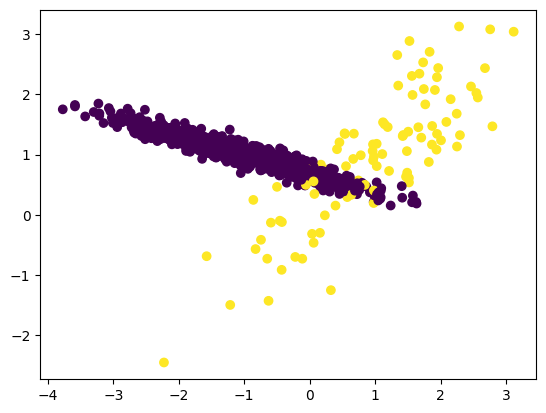

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [ ]:
# !pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample =SMOTE()
X,y = oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [ ]:
X.shape

(1800, 2)

In [ ]:
df1=pd.DataFrame(X , columns=['f1','f2'])
df2=pd.DataFrame(y , columns=['target'])
oversampled_df = pd.concat([df1,df2],axis=1)

In [ ]:
oversampled_df

,f1,f2,target
0,-1.720390,1.207832,0
1,-0.935738,0.899830,0
2,-1.733930,1.159825,0
3,-1.663650,1.099829,0
4,-1.062062,0.962465,0
...,...,...,...
1795,1.106184,1.014071,1
1796,0.847138,0.376445,1
1797,0.263925,0.743471,1
1798,-0.533635,-0.114789,1


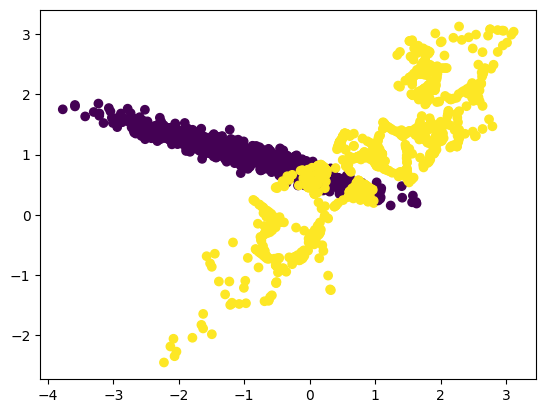

In [ ]:
plt.scatter(oversampled_df['f1'],oversampled_df['f2'],c=oversampled_df['target'])

In [ ]:
oversampled_df['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [ ]:
# EDA - to do manually (recod)